In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\abhyu\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
customers = pd.read_csv('dataset/Customers.csv')
products = pd.read_csv('dataset/Products.csv')
transactions = pd.read_csv('dataset/Transactions.csv')

Displaying the first few rows of each dataframe

In [4]:
#Customers dataset :
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [5]:
#Products dataset :
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [6]:
#Transactions dataset :
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


Summary Statistics for each dataframe

In [7]:
#Customer Dataset :
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [8]:
#Product dataset :
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [9]:
#Transactions dataset :
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


Check for missing values in the dataset in Each dataset:

In [11]:
#Customer Dataset :
print("\nMissing Values in Customers:")
print(customers.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [12]:
#Product dataset :
print("\nMissing Values in Products:")
print(products.isnull().sum())


Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [13]:
#Transactions dataset :
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


EDA Visualizations

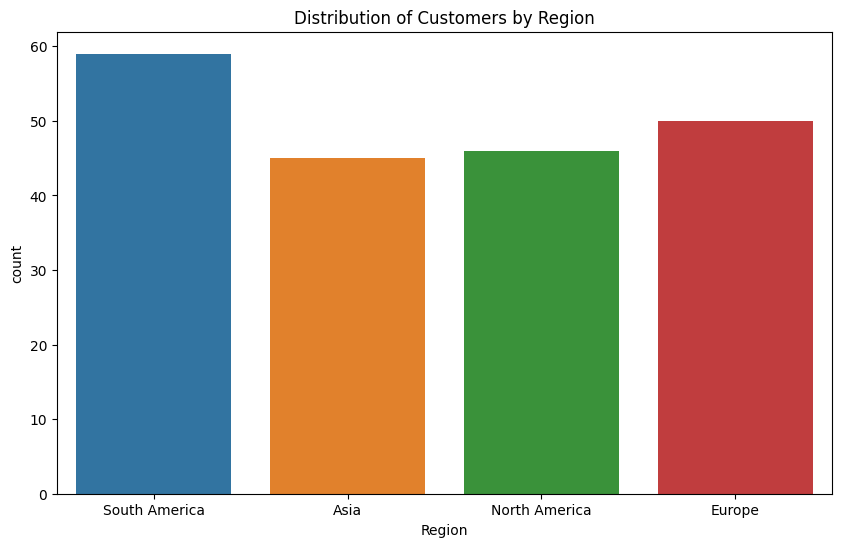

In [14]:
# Distribution of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Distribution of Customers by Region')
plt.show()


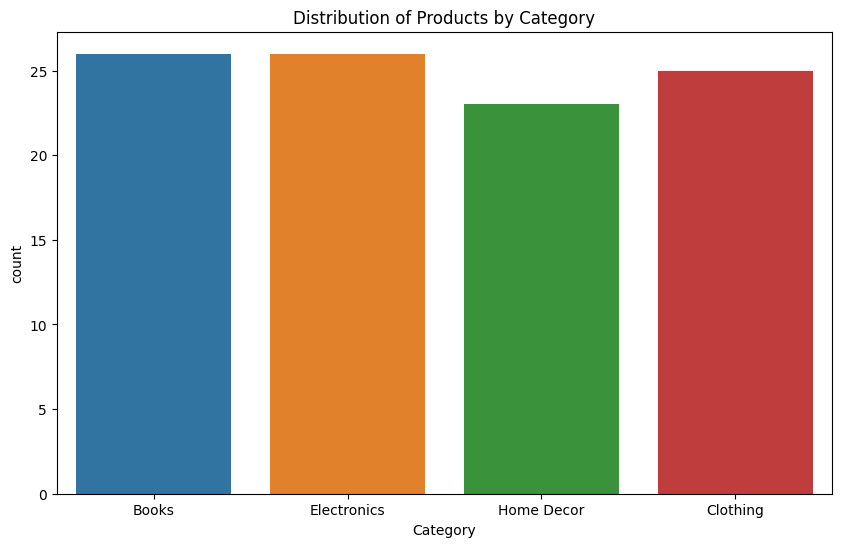

In [15]:
# Distribution of products by category
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Distribution of Products by Category')
plt.show()

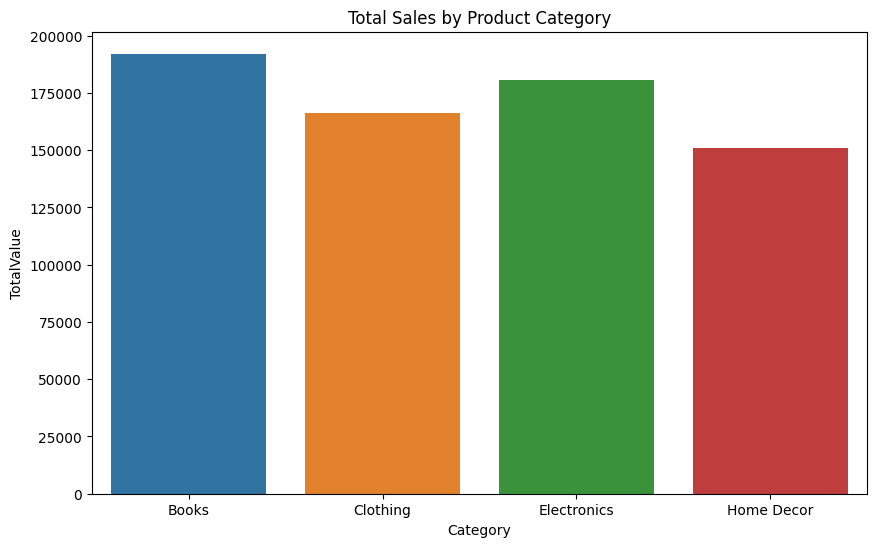

In [16]:
# Total sales by product category
total_sales_by_category = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_by_category, x='Category', y='TotalValue')
plt.title('Total Sales by Product Category')
plt.show()

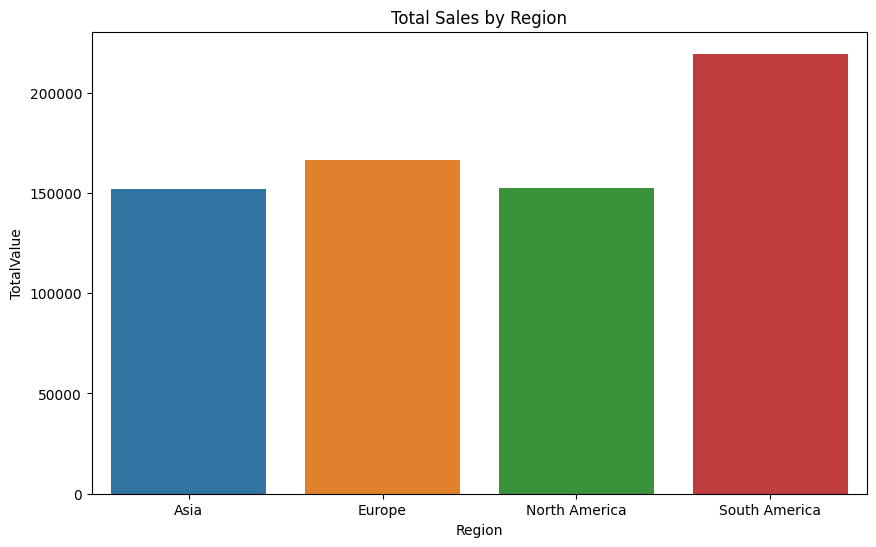

In [17]:
# Total sales by region
total_sales_by_region = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_by_region, x='Region', y='TotalValue')
plt.title('Total Sales by Region')
plt.show()

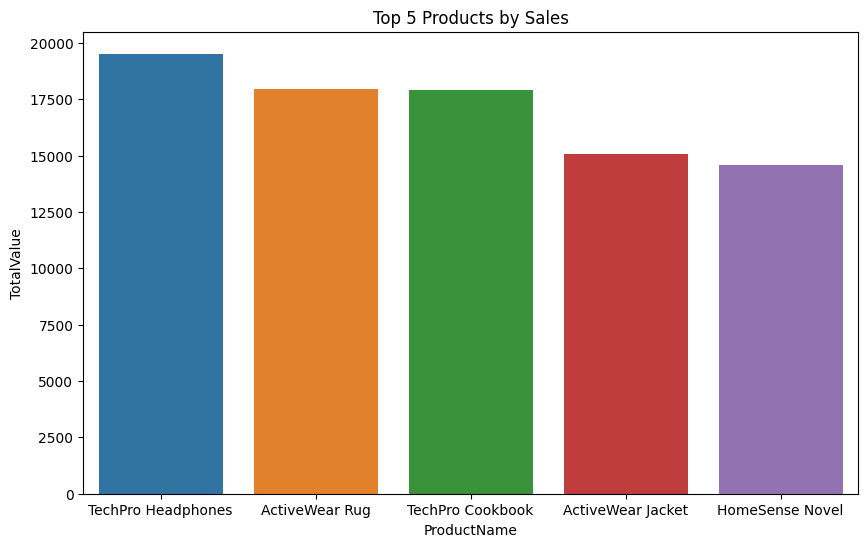

In [18]:
# Top 5 products by sales
top_products = transactions.groupby('ProductID')['TotalValue'].sum().reset_index().sort_values(by='TotalValue', ascending=False).head(5)
top_products = top_products.merge(products, on='ProductID')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='ProductName', y='TotalValue')
plt.title('Top 5 Products by Sales')
plt.show()